### Objective:
The proliferation of fake news has become a major challenge for modern societies, with potentially serious consequences for public trust, social cohesion, and political stability. Fake news can be deliberately created and disseminated through traditional and social media channels, making it difficult for individuals to distinguish between fact and fiction. In order to combat the spread of fake news, there is a growing need for effective and scalable methods to automatically detect and classify fake news articles. 

The goal of this project is to develop a machine learning-based system for fake news classification using natural language processing (NLP) techniques. The model will be able to predict whether an article is real or fake based on its content. 


In [45]:
import numpy as np
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data=pd.read_csv('train.csv')
testing_data= pd.read_csv('test.csv')

In [3]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
testing_data

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
...,...,...,...,...
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...


In [5]:
df=data.copy()
df_test= testing_data.copy()

df.info()
df[df.duplicated()]
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


id           0
title      558
author    1957
text        39
label        0
dtype: int64

## Data Preprocessing

In [6]:
df.drop(['id'], axis=1, inplace=True) ## Removing col ID since it is not signifant  
df.isnull().sum()


title      558
author    1957
text        39
label        0
dtype: int64

In [7]:
print(f"Number of data points for class 0 is {len(df[df['label']==0])} " )
print(f"Number of data points for class 1 is {len(df[df['label']==1])} " )

Number of data points for class 0 is 10387 
Number of data points for class 1 is 10413 


In [8]:
df[(df['title'].isnull() | df['author'].isnull()) & df['text'].isnull()]

,title,author,text,label
142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,NaN,1
573,Le top des recherches Google passe en top des ...,NaN,NaN,1
1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,NaN,1
1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,NaN,1
2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,NaN,1
2169,"#NDDL: Pour fêter l’autorisation des travaux, ...",NaN,NaN,1
2793,«Pourquoi je suis candidat à la présidentielle...,NaN,NaN,1
3329,GuinessBook : 100 millions d’Américains batten...,NaN,NaN,1
3729,Les Américains ne sont plus qu’à quelques heur...,NaN,NaN,1
4288,Hillary Clinton en 5 dates >> Le Gorafi,NaN,NaN,1


In [9]:
df[(df['title'].isnull() | df['text'].isnull()) & df['author'].isnull()]

,title,author,text,label
142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,NaN,1
573,Le top des recherches Google passe en top des ...,NaN,NaN,1
1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,NaN,1
1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,NaN,1
2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,NaN,1
2169,"#NDDL: Pour fêter l’autorisation des travaux, ...",NaN,NaN,1
2793,«Pourquoi je suis candidat à la présidentielle...,NaN,NaN,1
3329,GuinessBook : 100 millions d’Américains batten...,NaN,NaN,1
3729,Les Américains ne sont plus qu’à quelques heur...,NaN,NaN,1
4288,Hillary Clinton en 5 dates >> Le Gorafi,NaN,NaN,1


In [10]:
df[(df['author'].isnull() | df['text'].isnull()) & df['title'].isnull()]

,title,author,text,label


In [11]:
df[(df['title'].isnull() & df['author'].isnull()) | df['text'].isnull()]

,title,author,text,label
142,Gorafi Magazine : Entretien exclusif avec Bara...,NaN,NaN,1
573,Le top des recherches Google passe en top des ...,NaN,NaN,1
1200,La Corée du Nord annonce avoir envoyé un missi...,NaN,NaN,1
1911,Grand-Prix du Brésil – Romain Grosjean obtient...,NaN,NaN,1
2148,Gorafi Magazine: Barack Obama « Je vous ai déj...,NaN,NaN,1
2169,"#NDDL: Pour fêter l’autorisation des travaux, ...",NaN,NaN,1
2793,«Pourquoi je suis candidat à la présidentielle...,NaN,NaN,1
3329,GuinessBook : 100 millions d’Américains batten...,NaN,NaN,1
3729,Les Américains ne sont plus qu’à quelques heur...,NaN,NaN,1
4288,Hillary Clinton en 5 dates >> Le Gorafi,NaN,NaN,1


In [12]:
len(df[((df['title'].isnull() | df['author'].isnull()) | df['text'].isnull()) &( df['label']==0)]['label'])

26

In [13]:
len(df[((df['title'].isnull() | df['author'].isnull()) | df['text'].isnull()) &( df['label']==1)]['label'])

2489

Most of null values belong to class 1. Lets check the percencege of the null values, so if it is less than 5 percentage, wec can drop them.

In [14]:
(df.isnull().sum().sum()/ len(df))*100

12.278846153846153

About 12% of our data is null. In this case, we will keep them & will fill them with empty space. Then, we will merge all the text into one feature.

In [15]:
df.fillna("" , inplace=True)

In [16]:
df.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [17]:
df['content']= df['title']+" "+df['author']+" "+df['text']

In [18]:
df

,title,author,text,label,content
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...
...,...,...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Rapper T.I.: Trump a ’Poster Child For White S...
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Macy’s Is Said to Receive Takeover Approach by...
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"NATO, Russia To Hold Parallel Exercises In Bal..."


In [19]:
df_test.info()
df_test.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


id          0
title     122
author    503
text        7
dtype: int64

In [20]:
df_full=df[['content' , 'label']]
df_full

,content,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired Consortiumne...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1
...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,0
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",0
20797,Macy’s Is Said to Receive Takeover Approach by...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


Cleaning testing data

In [21]:
df_test.fillna("" , inplace=True)
df_test['content']= df_test['title']+" "+df_test['author']+" "+df_test['text']
df_test2=df_test[['content' ]]
df_test2['content']

0       Specter of Trump Loosens Tongues, if Not Purse...
1       Russian warships ready to strike terrorists ne...
2       #NoDAPL: Native American Leaders Vow to Stay A...
3       Tim Tebow Will Attempt Another Comeback, This ...
4       Keiser Report: Meme Wars (E995) Truth Broadcas...
                              ...                        
5195    The Bangladeshi Traffic Jam That Never Ends - ...
5196    John Kasich Signs One Abortion Bill in Ohio bu...
5197    California Today: What, Exactly, Is in Your Su...
5198    300 US Marines To Be Deployed To Russian Borde...
5199    Awkward Sex, Onscreen and Off - The New York T...
Name: content, Length: 5200, dtype: object

In [22]:
import string 
import re
import contractions


We will start with removing the contractions.

In [23]:
df_full['content']=  df_full['content'].str.lower().str.strip()
df_full['content'] = df_full['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df_full['content'] = df_full['content'].apply(lambda x: contractions.fix(x))


C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\2486588793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['content']=  df_full['content'].str.lower().str.strip()
C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\2486588793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['content'] = df_full['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\2486588793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [24]:
df_full

,content,label
0,house dem aide we did not even see comeys lett...,1
1,flynn hillary clinton big woman on campus bre...,0
2,why the truth might get you fired consortiumne...,1
3,15 civilians killed in single us airstrike hav...,1
4,iranian woman jailed for fictional unpublished...,1
...,...,...
20795,rapper ti trump a poster child for white supre...,0
20796,nfl playoffs schedule matchups and odds the n...,0
20797,macys is said to receive takeover approach by ...,0
20798,nato russia to hold parallel exercises in balk...,1


Cleaning Testing data

In [25]:
df_test2['content']=  df_test2['content'].str.lower().str.strip()
df_test2['content'] = df_test2['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df_test2['content'] = df_test2['content'].apply(lambda x: contractions.fix(x))

C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\3110585499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['content']=  df_test2['content'].str.lower().str.strip()
C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\3110585499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['content'] = df_test2['content'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\3110585499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [26]:
'''
apply instead of map: .apply() method is preferred over .map() for pandas series. 
 r'[^\w\s]' : this is the regular expression pattern that matches any non-word characters (such as punctuation marks) and
non-whitespace characters. Using ^ inside square brackets negates the pattern, so this will match any characters that are not word characters or whitespace characters, and will remove them from the string using re.sub() method.
'''
print()



In [27]:
from nltk.corpus import stopwords

nltk_stop_wrds=stopwords.words("english")
print(nltk_stop_wrds)
len(nltk_stop_wrds)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

179

nltk has only 179 stop words.

In [28]:
import spacy
#loading the english language small model of spacy
# !python -m spacy download en

en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print(sw_spacy)
print(len(sw_spacy))

{'sometimes', 'ever', 'already', 'that', 'each', 'quite', 'on', 'nothing', 'really', 'much', 'eight', 'yourselves', 'has', 'by', 'ourselves', 'except', '’d', 'via', 'ours', 'seeming', 'next', '’s', 'always', 'us', '’ve', 'while', 'this', '‘s', 'ten', 'beforehand', 'seemed', 'using', 'eleven', 'though', 'behind', 'he', 'few', 'whose', 'thence', 'one', "'d", 'we', 'others', 'did', 'our', 'nine', 'within', 'whole', 'where', 'among', 'show', 'twenty', 'under', 'see', 'becoming', 'and', 'with', '‘d', 'whenever', 'thereby', 'you', 'as', '’ll', 'throughout', 'last', '’m', 'also', '‘re', 'some', 'here', 'toward', 'if', 'yourself', 'have', 'own', 'through', "'ll", 'please', 'n’t', 'just', 'or', 'was', 'thru', 'sixty', 'for', 'any', 'whatever', 'afterwards', 'four', 'between', 'never', 'enough', 'yours', 'keep', 'same', 'there', 'to', 'several', 'after', 'yet', 'top', 'until', "'re", 'call', 'became', 'used', 'least', 'who', 'should', 'twelve', 'over', 'almost', 'such', 'hereafter', 'before', 'l

Spacy has 326 unique stop words.

In [29]:
import gensim
from gensim.parsing.preprocessing import  STOPWORDS
#print(STOPWORDS)
print( f"Gensim has {len(set(STOPWORDS))} unique stop words")

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print( f"Sklearn lib has {len(set(ENGLISH_STOP_WORDS))} unique stop words")

stop_wrds=sw_spacy.union(set(nltk_stop_wrds)).union(set(STOPWORDS)).union(set(ENGLISH_STOP_WORDS))

len(stop_wrds)

Gensim has 337 unique stop words
Sklearn lib has 318 unique stop words


412

Now my stop words list contains 412 words from NLTK,Spacy, Ginsim & sklearn libraries. I will keep updating my stop words if I notice any new stop words not added to the list.

In [30]:
stop_wrds=stop_wrds.union(set(['didnt', 'doesnt' ,'dont' , 'couldnt','wont', 'cant','shouldnt' ,'shallnt' ,'wouldnt' ,'havent' ,'hadnt', 'isnt','arent', 
                 'werent' , 'wasnt' ,'maynt' , 'mightnt']))

In [31]:
df_full['content']= df_full['content'].apply(nltk.word_tokenize)


C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\15816716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['content']= df_full['content'].apply(nltk.word_tokenize)


In [32]:
df_full['content']

0        [house, dem, aide, we, did, not, even, see, co...
1        [flynn, hillary, clinton, big, woman, on, camp...
2        [why, the, truth, might, get, you, fired, cons...
3        [15, civilians, killed, in, single, us, airstr...
4        [iranian, woman, jailed, for, fictional, unpub...
                               ...                        
20795    [rapper, ti, trump, a, poster, child, for, whi...
20796    [nfl, playoffs, schedule, matchups, and, odds,...
20797    [macys, is, said, to, receive, takeover, appro...
20798    [nato, russia, to, hold, parallel, exercises, ...
20799    [what, keeps, the, f35, alive, david, swanson,...
Name: content, Length: 20800, dtype: object

In [33]:
df_full['content']= df_full['content'].apply( lambda x: [ word for word in x if word not in stop_wrds])

C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\3049101171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['content']= df_full['content'].apply( lambda x: [ word for word in x if word not in stop_wrds])


In [34]:
print(df_full['content'][0])
print(df_full['content'][1])
print(df_full['content'][2])

['house', 'dem', 'aide', 'comeys', 'letter', 'jason', 'chaffetz', 'tweeted', 'darrell', 'lucus', 'house', 'dem', 'aide', 'comeys', 'letter', 'jason', 'chaffetz', 'tweeted', 'darrell', 'lucus', 'october', '30', '2016', 'subscribe', 'jason', 'chaffetz', 'stump', 'american', 'fork', 'utah', 'image', 'courtesy', 'michael', 'jolley', 'available', 'creative', 'commonsby', 'license', 'apologies', 'keith', 'olbermann', 'doubt', 'worst', 'person', 'world', 'weekfbi', 'director', 'james', 'comey', 'according', 'house', 'democratic', 'aide', 'looks', 'like', 'know', 'secondworst', 'person', 'turns', 'comey', 'sent', 'nowinfamous', 'letter', 'announcing', 'fbi', 'looking', 'emails', 'related', 'hillary', 'clintons', 'email', 'server', 'ranking', 'democrats', 'relevant', 'committees', 'hear', 'comey', 'tweet', 'republican', 'committee', 'chairmen', 'know', 'comey', 'notified', 'republican', 'chairmen', 'democratic', 'ranking', 'members', 'house', 'intelligence', 'judiciary', 'oversight', 'committee

Stop words have been removed. Below function will remove emojis from the text.

In [35]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"U0001F600-U0001F64F"  # emoticons
                           u"U0001F300-U0001F5FF"  # symbols & pictographs
                           u"U0001F680-U0001F6FF"  # transport & map symbols
                           u"U0001F1E0-U0001F1FF"  # flags (iOS)
                           u"U00002702-U000027B0"
                           u"U000024C2-U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [36]:
#df_full['content']= df_full['content'].apply( lambda x: remove_emoji )

In [37]:
df_full['content']

0        [house, dem, aide, comeys, letter, jason, chaf...
1        [flynn, hillary, clinton, big, woman, campus, ...
2        [truth, fired, consortiumnewscom, truth, fired...
3        [15, civilians, killed, single, airstrike, ide...
4        [iranian, woman, jailed, fictional, unpublishe...
                               ...                        
20795    [rapper, ti, trump, poster, child, white, supr...
20796    [nfl, playoffs, schedule, matchups, odds, new,...
20797    [macys, said, receive, takeover, approach, hud...
20798    [nato, russia, hold, parallel, exercises, balk...
20799    [keeps, f35, alive, david, swanson, david, swa...
Name: content, Length: 20800, dtype: object

In [38]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

df_full['content']= df_full['content'].apply( lambda x: [ stemmer.stem(w) for w in x])

C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\698784768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['content']= df_full['content'].apply( lambda x: [ stemmer.stem(w) for w in x])


In [39]:
print(df_full['content'][0])
print(df_full['content'][1])
print(df_full['content'][2])

['hous', 'dem', 'aid', 'comey', 'letter', 'jason', 'chaffetz', 'tweet', 'darrel', 'lucu', 'hous', 'dem', 'aid', 'comey', 'letter', 'jason', 'chaffetz', 'tweet', 'darrel', 'lucu', 'octob', '30', '2016', 'subscrib', 'jason', 'chaffetz', 'stump', 'american', 'fork', 'utah', 'imag', 'courtesi', 'michael', 'jolley', 'avail', 'creativ', 'commonsbi', 'licens', 'apolog', 'keith', 'olbermann', 'doubt', 'worst', 'person', 'world', 'weekfbi', 'director', 'jame', 'comey', 'accord', 'hous', 'democrat', 'aid', 'look', 'like', 'know', 'secondworst', 'person', 'turn', 'comey', 'sent', 'nowinfam', 'letter', 'announc', 'fbi', 'look', 'email', 'relat', 'hillari', 'clinton', 'email', 'server', 'rank', 'democrat', 'relev', 'committe', 'hear', 'comey', 'tweet', 'republican', 'committe', 'chairmen', 'know', 'comey', 'notifi', 'republican', 'chairmen', 'democrat', 'rank', 'member', 'hous', 'intellig', 'judiciari', 'oversight', 'committe', 'agenc', 'review', 'email', 'recent', 'discov', 'order', 'contain', 'cl

In [40]:
df_test2['content']= df_test2['content'].apply(nltk.word_tokenize)
df_test2['content']= df_test2['content'].apply( lambda x: [ word for word in x if word not in stop_wrds])
df_test2['content']= df_test2['content'].apply( lambda x: [ stemmer.stem(w) for w in x])

C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\2123955312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['content']= df_test2['content'].apply(nltk.word_tokenize)
C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\2123955312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['content']= df_test2['content'].apply( lambda x: [ word for word in x if word not in stop_wrds])
C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\2123955312.py:3: SettingWithCopyWarning: 
A value is trying to be set

## EDA

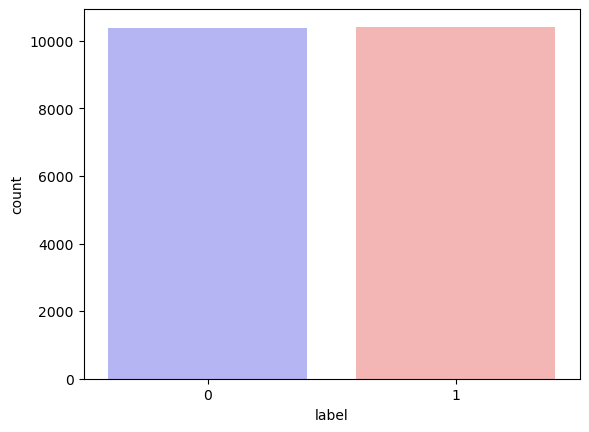

In [41]:
sns.countplot(x="label", data=df_full, palette="bwr")
plt.show()

In [42]:
text = " ".join(df_full['content'].apply(lambda x: " ".join(x)))



In [43]:
stop_wrds.update(["said", "will", "new", "many", "one", "now", "day", "even"])


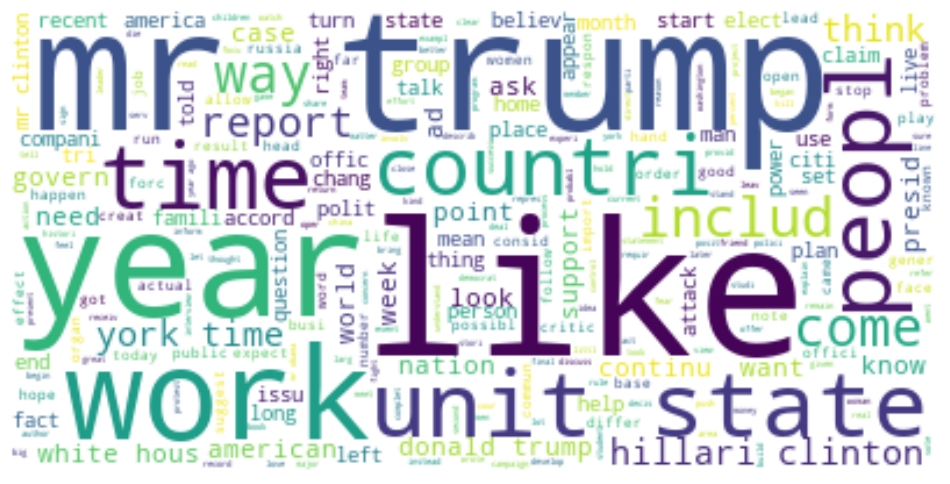

In [46]:

wordcloud = WordCloud(stopwords=stop_wrds, background_color="white" , max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.show()

## Model Training

In [47]:
df_full['content']=df_full['content'].apply( lambda x: " ".join(x))
df_test2['content']=df_test2['content'].apply( lambda x: " ".join(x))

df_full['content']

C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\4260595941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['content']=df_full['content'].apply( lambda x: " ".join(x))
C:\Users\Asia\AppData\Local\Temp\ipykernel_1500\4260595941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2['content']=df_test2['content'].apply( lambda x: " ".join(x))


0        hous dem aid comey letter jason chaffetz tweet...
1        flynn hillari clinton big woman campu breitbar...
2        truth fire consortiumnewscom truth fire octob ...
3        15 civilian kill singl airstrik identifi jessi...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795    rapper ti trump poster child white supremaci j...
20796    nfl playoff schedul matchup odd new york time ...
20797    maci said receiv takeov approach hudson bay ne...
20798    nato russia hold parallel exercis balkan alex ...
20799    keep f35 aliv david swanson david swanson auth...
Name: content, Length: 20800, dtype: object

In [48]:
X=df_full['content']
y=df_full['label']

- We will use Tfidf to convert the text documents into vectors, and then we will train 3 ML classifier models and will select the best one.

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer


#Tfidf  -- TERM FREQUENCY  -- INVERSE DOCUMENNT FREQUNCY

transformer = TfidfVectorizer()

X=transformer.fit_transform(X)

In [50]:
transformer.get_feature_names()

C:\Users\Asia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '0000',
 '0000035',
 '00001400',
 '000025',
 '0001',
 '00011',
 '00013',
 '0002',
 '0004',
 '0005',
 '0006',
 '0007',
 '0008',
 '0009',
 '000c',
 '000th',
 '001',
 '0010',
 '0011',
 '0012',
 '0015',
 '0016',
 '002',
 '0021',
 '0023z',
 '0024',
 '0025',
 '0027',
 '0028',
 '003',
 '0031',
 '0033',
 '0038',
 '004',
 '0041',
 '0042',
 '0043',
 '004333',
 '0044',
 '0045',
 '0047',
 '0048',
 '0049',
 '005',
 '0050',
 '0053',
 '0054',
 '0054z',
 '0055',
 '0056',
 '0059',
 '006',
 '007',
 '008',
 '00820162017cr',
 '009',
 '00addmouselistenerthi',
 '00addmousemotionlistenerthi',
 '00repaint',
 '00setpreferredsizenew',
 '01',
 '010',
 '0100',
 '0101',
 '0102',
 '0103',
 '01042009',
 '01042015',
 '0105',
 '0108',
 '011',
 '011116',
 '01112016',
 '011209',
 '011235813',
 '0115',
 '012',
 '0121',
 '0125',
 '0127',
 '01302016',
 '013107',
 '0132',
 '0133',
 '0134',
 '013705',
 '01371journalpgen0020143',
 '014',
 '0140',
 '0143',
 '0144',
 '0148',
 '015',
 '0150',
 '0152',
 '0153',
 '

#### 1) Naive bayes Classifier

In [51]:
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.metrics import accuracy_score , recall_score, precision_score ,auc 
from sklearn.metrics import roc_curve ,confusion_matrix , roc_auc_score, classification_report , f1_score
from sklearn.naive_bayes import MultinomialNB

mnclaciffier = MultinomialNB()

#mnclaciffier.fit(X,y)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(mnclaciffier, X, y, cv = k_folds)

In [52]:
scores

array([0.834375  , 0.85625   , 0.84399038, 0.85769231, 0.84735577])

#### 2) KNN Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier  

for i in range(2,11):
    classifier= KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2 )  
    classifier.fit(X, y)  
    y_predicted=classifier.predict(X)
    fpr,tpr, th=roc_curve(y, y_predicted ,pos_label= 1)
    print(f"n_neighbors {i}")
    print("auc", auc(fpr,tpr))
    print("accuracy : ", accuracy_score(y,y_predicted))
    print("recall: ", recall_score(y,y_predicted , average='macro'))
    print('precision:',precision_score(y,y_predicted , average='macro'))
    print()

n_neighbors 2
auc 0.9080956496686834
accuracy :  0.9079807692307692
recall:  0.9080956496686834
precision: 0.9222014470368263

n_neighbors 3
auc 0.9299436405369383
accuracy :  0.9299038461538461
recall:  0.9299436405369383
precision: 0.9316342318703856

n_neighbors 4
auc 0.8914092654231311
accuracy :  0.8912980769230769
recall:  0.8914092654231311
precision: 0.9040563343717549

n_neighbors 5
auc 0.9083763592419075
accuracy :  0.9083173076923077
recall:  0.9083763592419074
precision: 0.9119743414031829

n_neighbors 6
auc 0.8874627448336156
accuracy :  0.8873557692307692
recall:  0.8874627448336156
precision: 0.8990199196207456

n_neighbors 7
auc 0.8995395665882651
accuracy :  0.8994711538461538
recall:  0.8995395665882651
precision: 0.9042950307732562

n_neighbors 8
auc 0.8818353922908775
accuracy :  0.8817307692307692
recall:  0.8818353922908775
precision: 0.8927141728140465

n_neighbors 9
auc 0.8935339682622101
accuracy :  0.8934615384615384
recall:  0.8935339682622101
precision: 0.89

In [54]:

KNNclassifier= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2 )
scores = cross_val_score(KNNclassifier, X, y, cv = k_folds)
scores

array([0.85192308, 0.85408654, 0.86322115, 0.85144231, 0.84615385])

#### 3) XGBoostClassifier

In [55]:
from xgboost import XGBClassifier

xgbclassifier = XGBClassifier(n_estimators=700, random_state=1)
scores = cross_val_score(xgbclassifier, X, y, cv = k_folds)
scores

array([0.98269231, 0.98317308, 0.98389423, 0.97451923, 0.97788462])

In [56]:
xgbclassifier.fit(X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=700, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [57]:
xgbclassifier.score(X,y)

1.0

##### xgbclassifier is the best model. 

In [58]:
X_test=df_test2['content']
X_test=transformer.transform(X_test)
X_test

<5200x171167 sparse matrix of type '<class 'numpy.float64'>'
	with 1211897 stored elements in Compressed Sparse Row format>

In [59]:
y_predicted=xgbclassifier.predict(X_test)
y_predicted

array([0, 1, 1, ..., 0, 1, 0])

In [60]:
df_submit=pd.read_csv('submit.csv')
df_submit

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1
...,...,...
5195,25995,0
5196,25996,0
5197,25997,0
5198,25998,1


In [61]:
df_submit['label']=y_predicted

In [62]:
df_submit

,id,label
0,20800,0
1,20801,1
2,20802,1
3,20803,0
4,20804,1
...,...,...
5195,25995,0
5196,25996,0
5197,25997,0
5198,25998,1


In [63]:
df_submit.to_csv('submit.csv' , index=False)

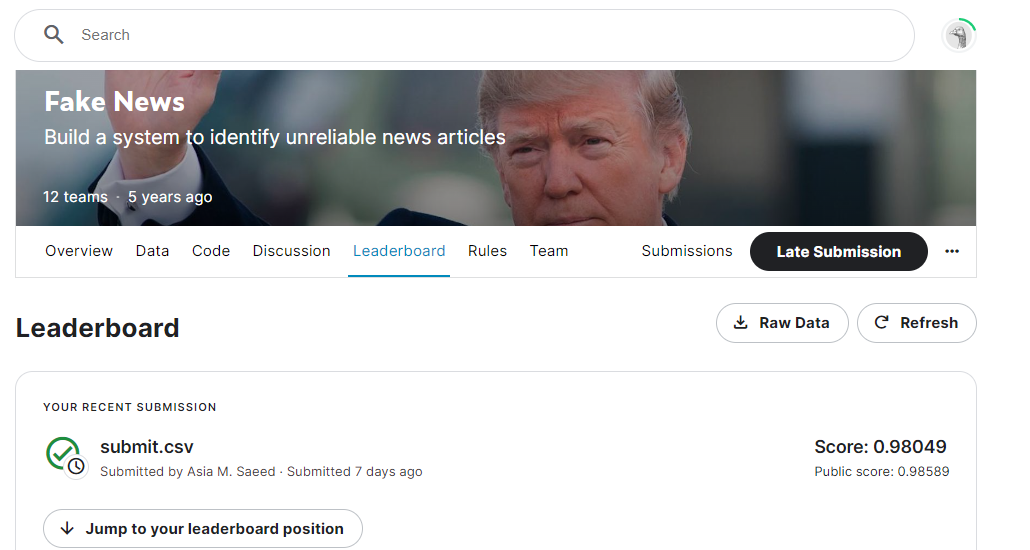


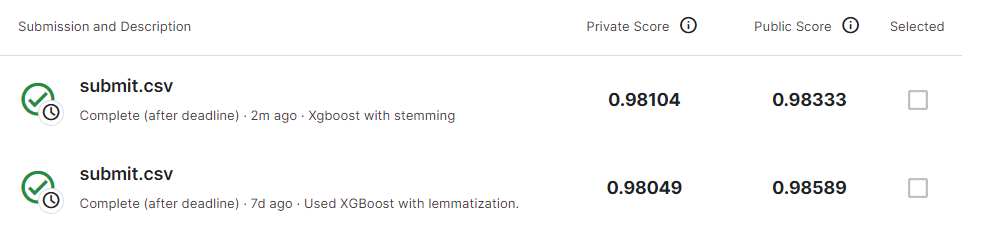

In [64]:

import joblib
joblib.dump(xgbclassifier, 'fake_news_model.joblib')

joblib.dump(transformer, 'transformer_tfidf.joblib')


['transformer_tfidf.joblib']

In [65]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 9E12-E81A

 Directory of C:\Users\Asia\Data_Science_Code\new intership\Neural Networks\NLP\Assignment-fake_news

04/02/2023  01:24 PM    <DIR>          .
04/02/2023  01:24 PM    <DIR>          ..
03/26/2023  11:45 AM    <DIR>          .ipynb_checkpoints
04/02/2023  01:17 PM             1,525 app.py
04/02/2023  01:24 PM         1,055,303 Fake_News_Classifications.ipynb
04/02/2023  01:24 PM           965,791 fake_news_model.joblib
04/02/2023  01:17 PM            46,810 submit.csv
11/29/2019  07:22 AM        25,144,581 test.csv
11/29/2019  07:22 AM        98,628,550 train.csv
04/02/2023  01:24 PM         5,586,898 transformer_tfidf.joblib
               7 File(s)    131,429,458 bytes
               3 Dir(s)  750,351,491,072 bytes free
